#Abandono de Empleados

##Objetivo del proyecto
*   es reducir la fuga de empleados de la empresa.

##Cómo lograr el objetivo

*   Entender y cuantificar el problema desde el punto de vista de negocio.

*   Desarrollar un sistema automatizado de machine learning que identifique a los empleados que están en mayor riesgo de fuga.

*   Comunicar los resultados de forma exitosa a la dirección.

##Cargar las librerias

In [ ]:
#Librerias para el proyecto
import numpy as np
import os
import pandas as pd

#Manejo de valores núlos
import missingno as msno

#Visualización
import matplotlib.pyplot as plt

##Autentificación con google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Cargar los datos desde el dataSet

In [ ]:
#Cargamos el path del los archivos en la variable ruta
ruta = '/content/drive/MyDrive/Proyecto_real'
#Listamos los archivos que tenemos en la carpeta files
os.listdir(ruta)

['AbandonoEmpleados.csv', 'AbandonoEmpleados.ipynb']

In [ ]:
df = pd.read_csv(ruta+'/AbandonoEmpleados.csv', sep=';', index_col='id', na_values='#N/D')

##Información básica del dataset
*   Cantidad de filas y columnas
*   Tipo de cada columna

Para este ejecicio en particular como es de abandono de empleados la variable "abandono" es la variable target o variable objetivo.

In [ ]:
df.shape

(1470, 31)

In [ ]:
df.columns

Index(['edad', 'abandono', 'viajes', 'departamento', 'distancia_casa',
       'educacion', 'carrera', 'empleados', 'satisfaccion_entorno', 'sexo',
       'implicacion', 'nivel_laboral', 'puesto', 'satisfaccion_trabajo',
       'estado_civil', 'salario_mes', 'num_empresas_anteriores', 'mayor_edad',
       'horas_extra', 'incremento_salario_porc', 'evaluacion',
       'satisfaccion_companeros', 'horas_quincena', 'nivel_acciones',
       'anos_experiencia', 'num_formaciones_ult_ano', 'conciliacion',
       'anos_compania', 'anos_en_puesto', 'anos_desde_ult_promocion',
       'anos_con_manager_actual'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

##La Calidad de los datos

*   Datos nulos.
*   Problemas con datos atipicos.
*   Variables fuera del rango normal.


##Análisis de datos Faltantes o nulos

Detectamos los datos nulos
missing values count -> recuento de valores perdidos

In [ ]:
missing_values_count  = df.isna().sum()
missing_values_count

edad                           0
abandono                       0
viajes                         0
departamento                   0
distancia_casa                 0
educacion                    101
carrera                        0
empleados                      0
satisfaccion_entorno           0
sexo                         199
implicacion                   18
nivel_laboral                  0
puesto                         0
satisfaccion_trabajo          76
estado_civil                   0
salario_mes                    0
num_empresas_anteriores        0
mayor_edad                     0
horas_extra                    0
incremento_salario_porc        0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
nivel_acciones                 0
anos_experiencia               0
num_formaciones_ult_ano        0
conciliacion                1011
anos_compania                  0
anos_en_puesto              1238
anos_desde_ult_promocion       0
anos_con_m

In [ ]:
df.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

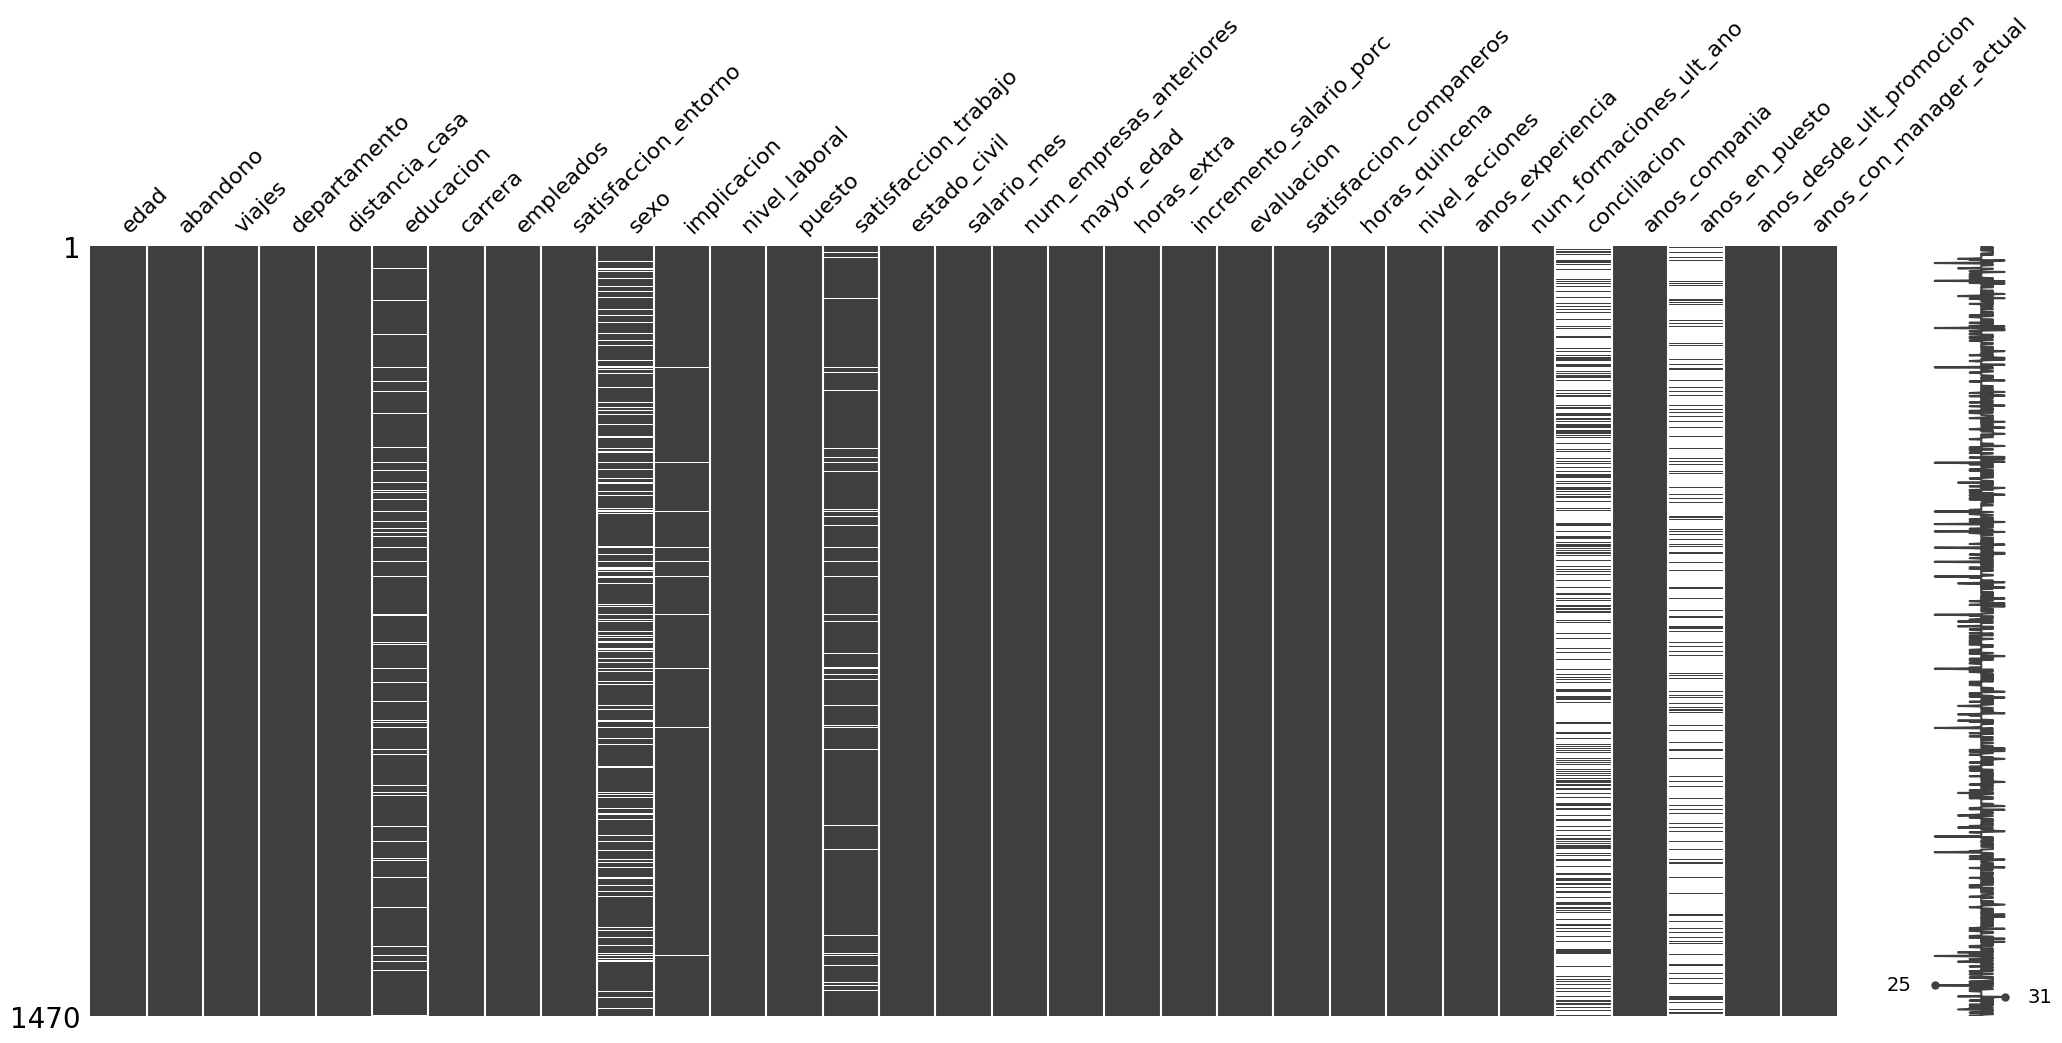

In [ ]:
msno.matrix(df);

#Conclusiones:
anos_en_puesto y conciliacion tienen demasiados datos nulos --> Eliminamos las variables.
sexo, educacion, satisfaccion_trabajo e implicacion --> imputamos los datos (Valor más provable tras el EDA).

Eliminamos las columnas que en este caso son irrelevantes por la cantidad de nulos

In [ ]:
#df.drop(columns=['anos_en_puesto', 'conciliacion']) de forma temporal
#El inplace es para que sea definitivo en el df
df.drop(columns=['anos_en_puesto', 'conciliacion'], inplace=True)
df.shape

(1470, 29)

In [ ]:
df.isna().sum().sort_values(ascending=False)

sexo                        199
educacion                   101
satisfaccion_trabajo         76
implicacion                  18
edad                          0
mayor_edad                    0
anos_desde_ult_promocion      0
anos_compania                 0
num_formaciones_ult_ano       0
anos_experiencia              0
nivel_acciones                0
horas_quincena                0
satisfaccion_companeros       0
evaluacion                    0
incremento_salario_porc       0
horas_extra                   0
estado_civil                  0
num_empresas_anteriores       0
salario_mes                   0
abandono                      0
puesto                        0
nivel_laboral                 0
satisfaccion_entorno          0
empleados                     0
carrera                       0
distancia_casa                0
departamento                  0
viajes                        0
anos_con_manager_actual       0
dtype: int64

##Registros duplicados

In [ ]:
df[df.duplicated()]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,


##Conclusión
En este dataset no tenemos registros duplicados

##Análisis Exploratorio de Datos EDA
###Variables categóricas
Las que no son de tipo numérico
1.  Creamos una función para graficar o analizar todas las variables categóricas a la vez.
2.  Buscamos las cosas extrañas y entendomos los datos con las graficas.
3.  Conclusiones.
4.  Aplicamos las conclusiones o las correcciones.

In [ ]:
def graficos_eda_categoricos(cat):
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1]/2)

    #Defiimos el tipo de gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas*6))

    #Aplanamos para iterar por el gráfico como si fuera de una dimensión en lugar de 2
    ax=ax.flat

    #Creamos el ciclo que añade al gráfico
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax=ax[cada])
        ax[cada].set_title(variable, fontsize=12, fontweight='bold')
        ax[cada].tick_params(labelsize=12)

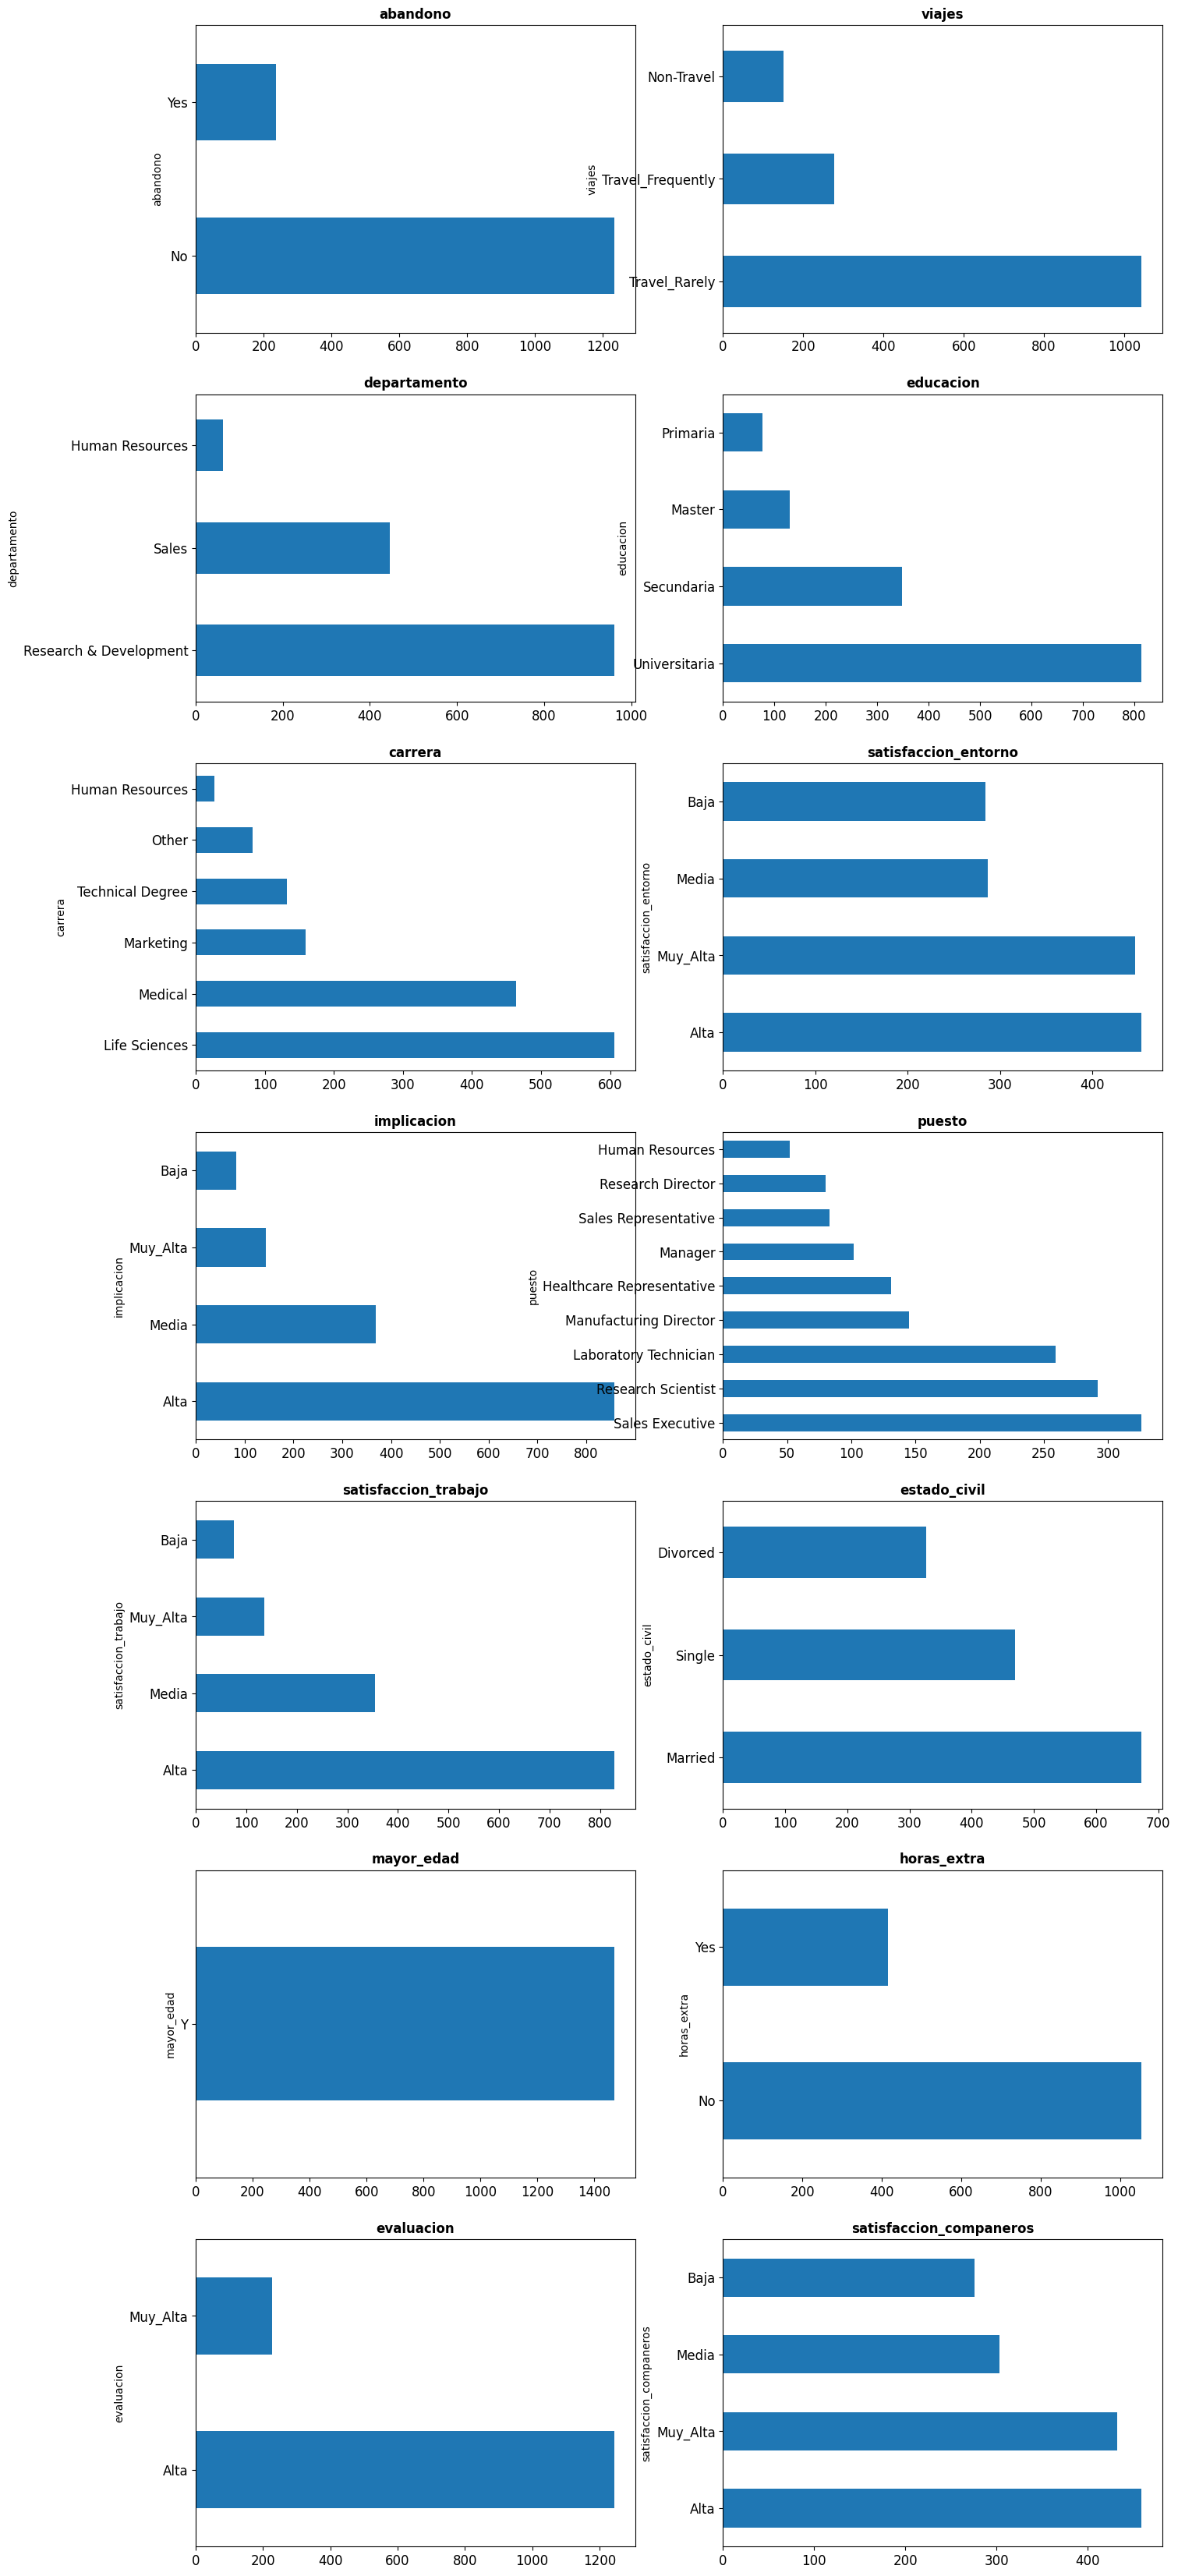

In [ ]:
graficos_eda_categoricos(df.select_dtypes('O'))

##Conclusiones de variables categóricas:
*   Mayor de edat tieno solomante un valor --> la eliminamos
*   Sibre las imputaciones:
    *   educación imputar por 'Universitaria'
    *   satisfaccion_trabajo: imputar por 'Alta'
    *   implicacion: imputar por 'Alta'

In [ ]:
df.drop(columns='mayor_edad', inplace=True)
df['educacion'] = df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

###Variables Numéricas

1.  Creamos una función para analizar todas las variables numéricas de forma estadistica.
2.  Buscamos las cosas extrañas y entendomos los datos con las graficas.
3.  Conclusiones.
4.  Aplicamos las conclusiones o las correcciones.

La media (mean) se calcula sumando todos los valores y dividiendo la suma entre el número total de valores.

La mediana (median) se puede calcular poniendo los números en orden ascendente y luego localizando el número del centro de esa distribución.

In [ ]:
def estadisticos_cont(num):
    #calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #lo retornamos
    return (estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,std,min,25%,50%,75%,max,median
edad,1470.0,36.923810,9.135373,18.000,30.000000,36.000,43.000000,60.000,36.000
abandono,1470.0,0.161224,0.367863,0.000,0.000000,0.000,0.000000,1.000,0.000
distancia_casa,1470.0,9.192517,8.106864,1.000,2.000000,7.000,14.000000,29.000,7.000
nivel_laboral,1470.0,2.063946,1.106940,1.000,1.000000,2.000,3.000000,5.000,2.000
salario_mes,1470.0,6502.931293,4707.956783,1009.000,2911.000000,4919.000,8379.000000,19999.000,4919.000
num_empresas_anteriores,1470.0,2.693197,2.498009,0.000,1.000000,2.000,4.000000,9.000,2.000
incremento_salario_porc,1470.0,15.209524,3.659938,11.000,12.000000,14.000,18.000000,25.000,14.000
nivel_acciones,1470.0,0.793878,0.852077,0.000,0.000000,1.000,1.000000,3.000,1.000
anos_experiencia,1470.0,11.279592,7.780782,0.000,6.000000,10.000,15.000000,40.000,10.000
num_formaciones_ult_ano,1470.0,2.799320,1.289271,0.000,2.000000,3.000,3.000000,6.000,3.000


In [ ]:
pd.unique(df['sexo'])

array([ 3.,  2.,  4., nan,  1.])

##Conclusiones:
*   Empleados solo tien un valor --> Eliminarla.
*   Sexo tiene 4 valores --> Eliminarla.
*   Horas quincena solo tiene un vlaor --> Eliminarla.
*   De los nulos pendientes de imputación que son numéricas solamente esta el sexo, debido a que la eliminamos ya no hay que imputarla.

In [ ]:
df.drop(columns=['empleados', 'sexo', 'horas_quincena'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores   147

<Axes: xlabel='anos_experiencia'>

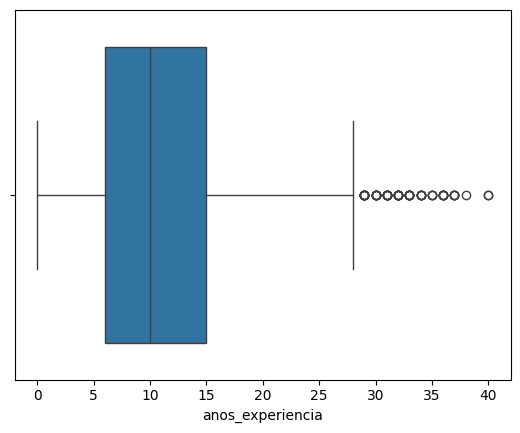

In [ ]:
import seaborn as sns
sns.boxplot(x = "anos_experiencia", data = df)

In [ ]:
df[df['anos_experiencia'] > 25]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
23,53,No,Travel_Rarely,Sales,2,Secundaria,Life Sciences,Baja,Media,4,...,No,16,Alta,Alta,0,31,3,25,3,7
32,53,No,Travel_Rarely,Research & Development,5,Universitaria,Other,Alta,Alta,5,...,No,11,Alta,Muy_Alta,1,26,3,14,4,8
80,50,No,Travel_Rarely,Research & Development,7,Secundaria,Medical,Media,Media,5,...,Yes,12,Alta,Muy_Alta,1,29,2,27,13,8
81,59,No,Travel_Rarely,Sales,25,Universitaria,Life Sciences,Baja,Alta,3,...,No,11,Alta,Muy_Alta,0,28,3,21,7,9
112,56,No,Travel_Rarely,Research & Development,7,Primaria,Life Sciences,Muy_Alta,Baja,3,...,No,11,Alta,Baja,0,37,3,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,47,No,Travel_Rarely,Research & Development,4,Secundaria,Life Sciences,Alta,Media,3,...,Yes,12,Alta,Alta,1,28,4,22,14,10
1867,48,No,Travel_Rarely,Research & Development,10,Secundaria,Life Sciences,Muy_Alta,Media,5,...,No,12,Alta,Muy_Alta,0,29,3,22,12,9
1938,58,No,Travel_Rarely,Sales,21,Universitaria,Life Sciences,Muy_Alta,Alta,4,...,Yes,13,Alta,Alta,1,29,2,1,0,0


##GENERAR LOS INSIGHTS
Cuantificación del problema:
1.  ¿Cual es la tasa de abandono?

value_counts --> Conteo de frecuencia

normalize --> en porcentaje

In [ ]:
df.abandono.value_counts(normalize=True)*100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

2.  ¿Hay un perfil tipo de empleado que deja la empresa?

Análisis de penetración: Cruzar la variable target o variable objetivo se cruza con cada una de las otras variables que puedan aportar valor.

Transformar abandono a númerico

In [ ]:
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

2.1.    Análisis por educación

<Axes: xlabel='educacion'>

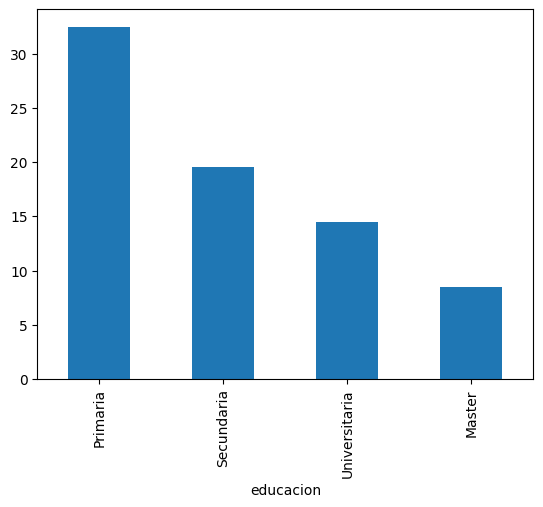

In [ ]:
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar()

2.2.    Análisis por estadi civil

<Axes: xlabel='estado_civil'>

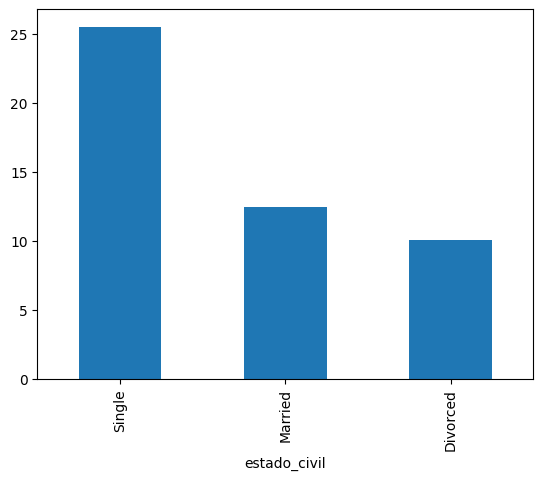

In [ ]:
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar()

2.3.    Análisis por horas extras

<Axes: xlabel='horas_extra'>

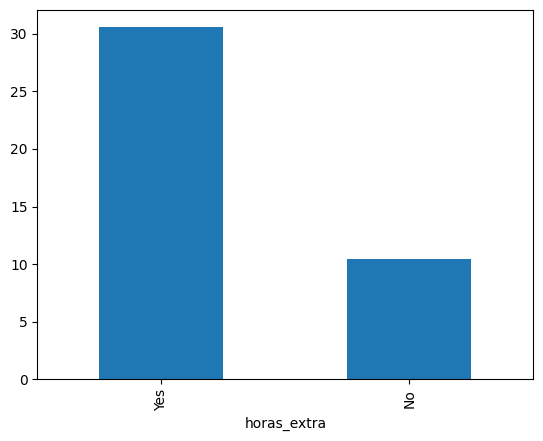

In [ ]:
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar()

2.4.    Análsis por puesto

<Axes: xlabel='puesto'>

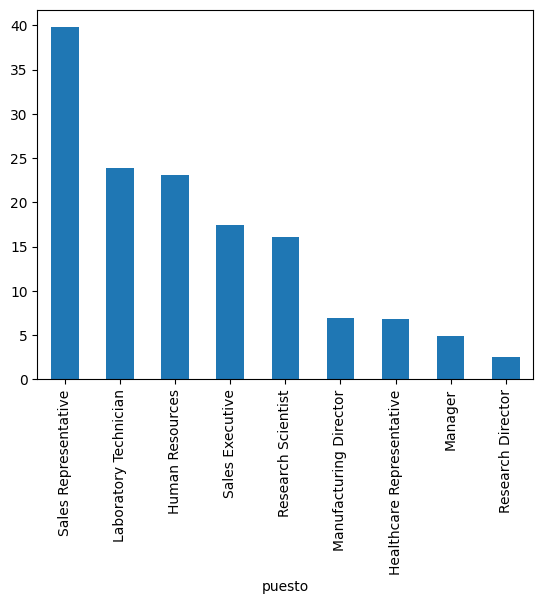

In [ ]:
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar()

2.5.    Análisis salario por mes
Como las dos son de tipo numérico se invierte, primero el abandono

<Axes: xlabel='abandono'>

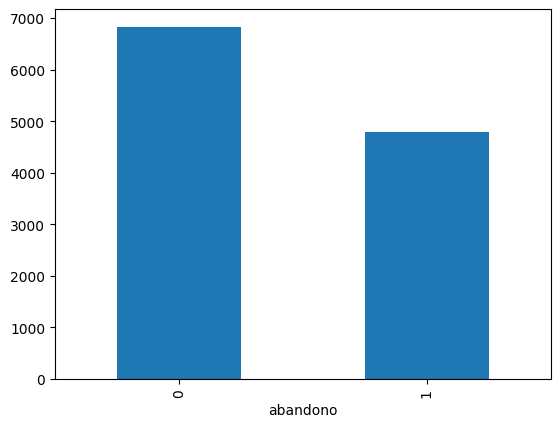

In [ ]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar()

2.6.    Conclusiones:

El perfil medio del empleado que deja la empresa es:

*   Bajo nivel educativo.
*   Soltero.
*   Trabaje en el área de ventas.
*   Bajo salario.
*   Alta carga de horas extras.

3.  ¿Cual es ek impacto económico de este problema?

Según el estudio "Cost of turnmover" del Center for American Progress:
*   El coste de la fuga de los empleados que ganan menos de 30000 es el 16.1% de su salario.
*   El coste de la fuga de los empleados que ganan entre 30000 - 50000 es el 19.7% de su salario.
*   El coste de la fuga de los empleados que ganan entre 50000 - 75000 es el 20.4% de su salario.
*   El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario.

3.1.    Creamos una nueva variable salario_ano del empleado

In [ ]:
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes', 'salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


3.2.    Calculamos el impacto económico de cada empleado si deja la empresa:
*   Lista de condiciones

In [ ]:
condiciones = [(df['salario_ano'] <= 30000),
               df['salario_ano'] > 30000 & (df['salario_ano'] <= 50000),
               df['salario_ano'] > 50000 & (df['salario_ano'] <= 75000),
               df['salario_ano'] > 75000]


*   Lista de resultados



In [ ]:
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.24, df.salario_ano * 0.21]

*   Aplicamos select

In [ ]:
df['impacto_abandono'] = np.select(condiciones, resultados, default=-999)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14167.452
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12127.320
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,23618.724
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,14519.688


3.2.    ¿Cúanto nos ha costado este problema en el último año?

In [ ]:
coste_total = df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2612822.6040000003

3.3.    ¿Cúanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación baja)

In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

353151.54000000004

3.4.    ¿Cúanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación Media)

In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Media')].impacto_abandono.sum()

715079.7600000001

3.5.    ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [ ]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")
print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")
print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 261282$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 522564$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 783846$ cada año.


4.0     Podemos seguir trazando estrategias dasociadas a los insights de abandono:

Se había visto que los representantes de ventas es el puesto con la tasa de más abandono. ¿Tiene sentido hacer algo para ellos? ¿cúal sería el coste ahorrado si disminuimos la fuga en un 30%?

4.1. Primero calculamos el porcentaje de ventas que se ha ido el año pasado.

In [ ]:
total_representates_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandono_representantes_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porcentaje_pasado = abandono_representantes_pasado / total_representates_pasado
porcentaje_pasado

0.39759036144578314

4.2.    Estimamos cuántos se irán este año.

In [ ]:
total_representantes_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_representantes_actual * porcentaje_pasado)
se_iran

19

4.3.    Sobre ellos cuantos podemos retener (Hipótesisi 30%) y cuanto dinero puede suponer.

In [ ]:
retenemos = int(se_iran * 0.30)
ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0), 'impacto_abandono'].sum() * porcentaje_pasado * 0.3
print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37224.56012530121$


El dato es muy interesante porque nos permite determinar el puesto para acciones de retención por departamento o perfil.

Sabiendo que nos podemos gastar hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas, estas se estarían pagando sóles con pérdica evitada.

Se ha visto lo que es la calidad de datos y por qué es tan importante.

Se ha hecho un análisis de nulos y corregido los errores.

Se ha realizado análisis exploratorio sobre todas nuestras variables.

Se ha realizado unas funciones para hacer EDA que nos permitirán analizar de una vez cientos de variables.

Se ha interiorizado un framework super útil para hacer Business Analyics y presentarlo de forma ganadora:
*   Paso 1: Cuantificación del problema.
*   Paso 2: Impacto económico.
*   Paso 3: Escenarios de ahorro.

Se ha experimentado todas las posibilidades de "tirar del hilo" que se nos abren cuando usamos esta metodología y cómo puedes aportar con ella gran valor práctico a las empresas.

#MODELO DE MACHINE LEARNING

In [ ]:
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

##1.    PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

In [ ]:
from sklearn.preprocessing import OneHotEncoder

**Para sklearn no puede haber datos nulos y todas las variables tienen que estar en formato numérico (Es obligatorio para sklearn)**

Otras con optativas como poner las variables en la misma escala, normalizar las variables en el sentido de una distribución normal (eje: Gaus)

*   Categóricas

In [ ]:
cat = df_ml.select_dtypes('O')

*   Instanciamos

In [ ]:
ohe = OneHotEncoder(sparse=False)

*   Entrenamos

In [ ]:
ohe.fit(cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

*   Aplicamos

In [ ]:
cat_ohe = ohe.transform(cat)

*   Ponemos los nombres

In [ ]:
cat_ohe = pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop=True)

In [ ]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Dataframe final
*   Seleccionamos las variables numéricas para poder unir a las cat_ohe

In [ ]:
num = df.select_dtypes('number').reset_index(drop = True)

Las unimos todas e el dataframe final.

In [ ]:
df_ml = pd.concat([cat_ohe, num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14167.452
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12127.320
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,23618.724
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,14519.688
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,12741.960


Tenemos la misma cantidad de registros pero se ha aumentado la cantidad de columnas.

##2.    DISEÑO DE LA MODELIZACIÓN.

2.1.    Separación predictoras y target

In [ ]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

2.2.    Separación train y test

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

##3.    ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [ ]:
from sklearn.tree import DecisionTreeClassifier

*   Instanciamos (el árbol con cuatro niveles)

In [ ]:
ac = DecisionTreeClassifier(max_depth=5)

*   Entrenar (método fit)

In [ ]:
ac.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5)

**Ya tenemos el modelo entrenado**

##4.    PREDICCIÓN Y VALIDACIÓN SOBRE EL TEST

4.1.    Predicción
(test_x) --> conjunto de datos que le pasamos es el que tenemos reservado, el modelo nolo ha visto.

[:1] --> Nos retorna las probabilidades que No deje la empresa 0, que deje la empresa 1; por eso elegimos el 1.

In [ ]:
prediccion = ac.predict_proba(test_x)[:, 1]
prediccion[:20]

array([0.03488372, 0.03488372, 0.22857143, 0.03821656, 0.03821656,
       0.03821656, 0.03821656, 0.13907285, 0.36842105, 0.08      ,
       0.08333333, 0.13907285, 0.6       , 0.41666667, 0.08196721,
       0.13907285, 0.03821656, 0.03488372, 0.08      , 0.03821656])

**Lo anteriro es la probabilidad de abandono de los 20 primeros empleados.**
En las diferentes ejecuciones salen números diferentes debido al componente aleatorio.

4.2.    Evaluación
Métricas: roc_auc_score --> es una de las métricas más faciles de interpretar y seguras; esta métrica nos retorna un número:

*   Si el número es < 0.7 significa que el modelo no es muy bueno.
*   Si el 0.7 <= número <= 0.8 significa que el modelos es bueno y práctico.
*   si el número > 0.8 es muy bueno.

Test_y --> es la realidad, el target.


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, prediccion)

0.7102721685689202

##5.    INTERPRETACIÓN

5.1.    Diagrama de árbol

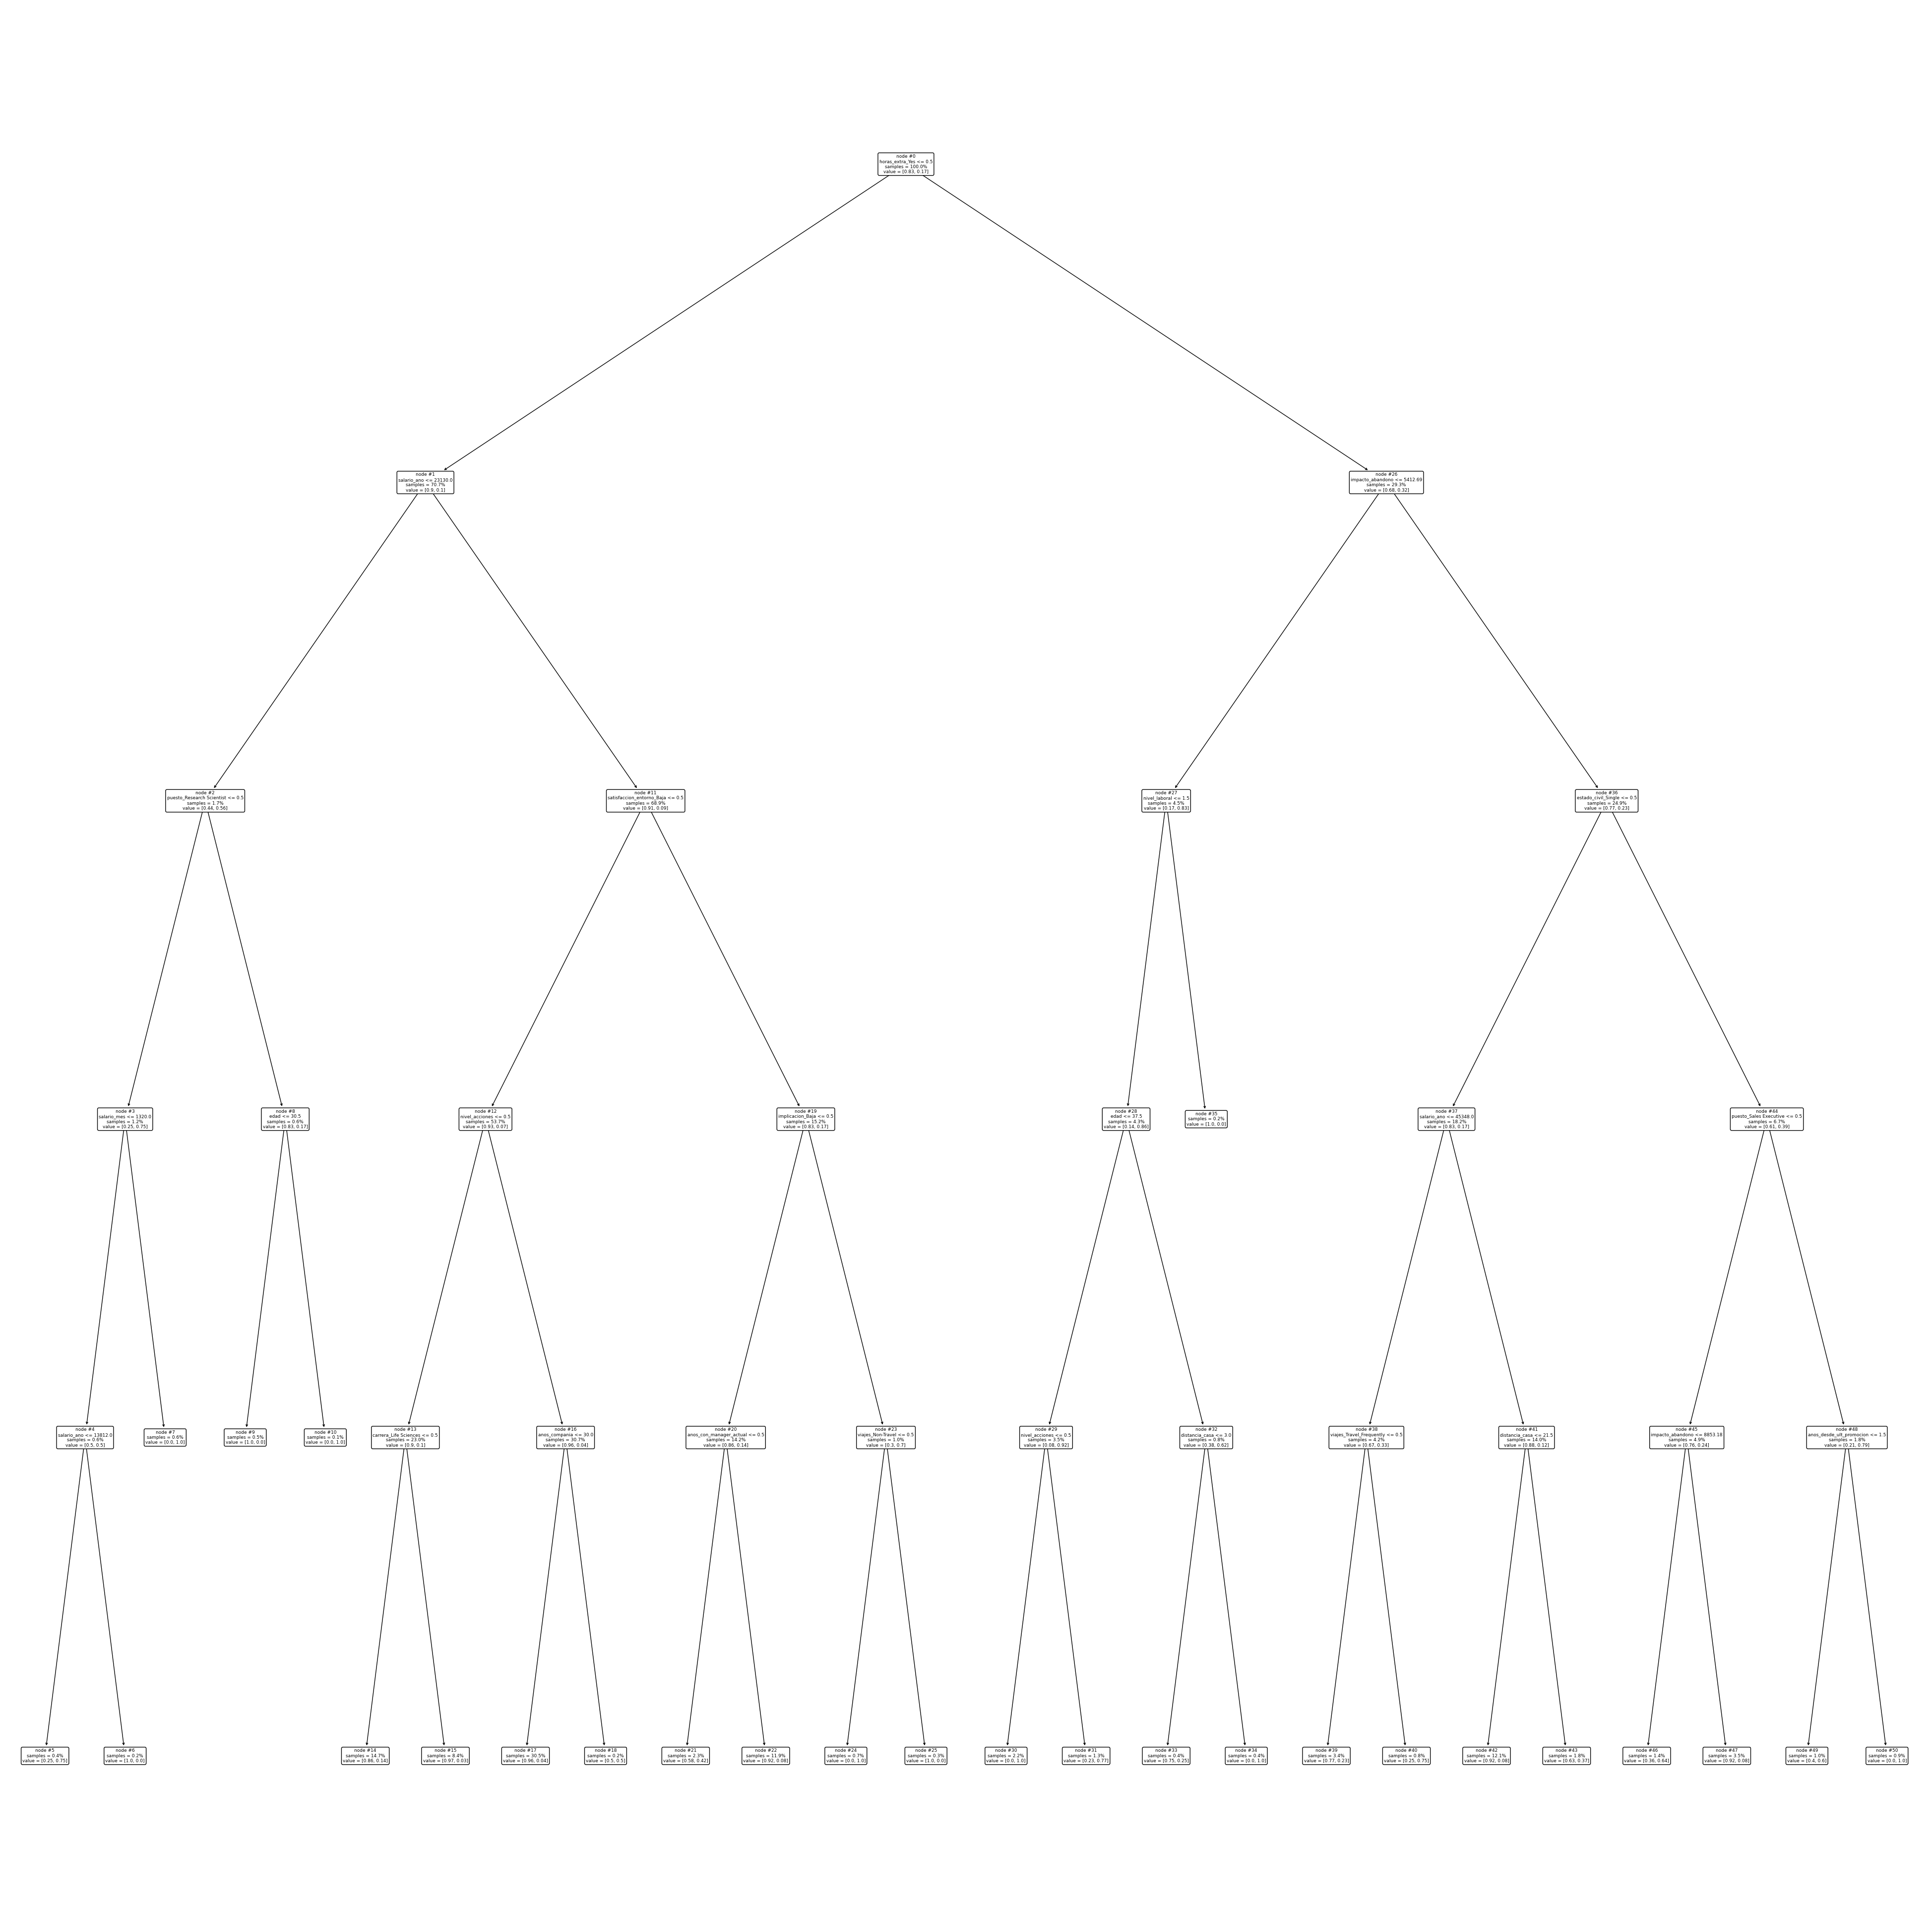

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 50))

plot_tree(ac,
          feature_names = test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

Para ver mejor la imagen click derecho abrr en una pestaña nueva.

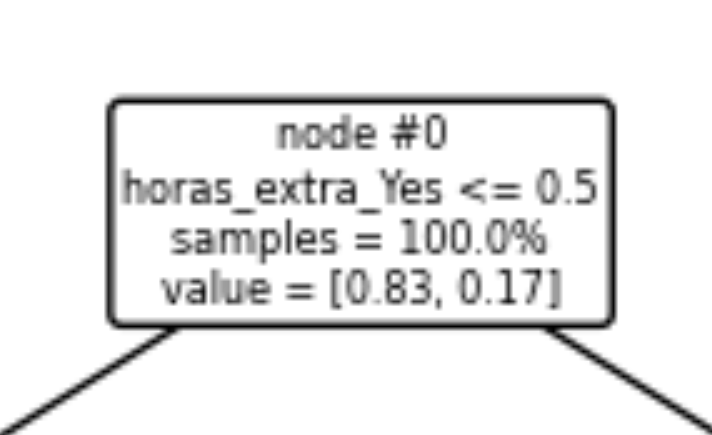

Es el conjunto de validación. (es el 30% de los empleados, pero muestra 100 porque esta tomando todo el 30%)

La variable value nos dice que 83% de ceros o sea que no abandonan y el 17% abandona.

Vemos que la variable de validación el terget al inicio nos dio  0.1622 y en la validación nos da 0.17, es muy cercana. Es bueno porque nos esta diciendo que es representativo del conjunto total de los empleados.

Para los nodos si se cumple la condicón se va por la izquierda en caso contrario se va por la derecha.

Las horas extras es la variable de corte, es la que mejor rompe el 17%. Tiene la condición de <= 0.5, se va por el lado izquierdo.
Entonces cuando el valor que si hace horas (1) extra se va por el lado derecho.



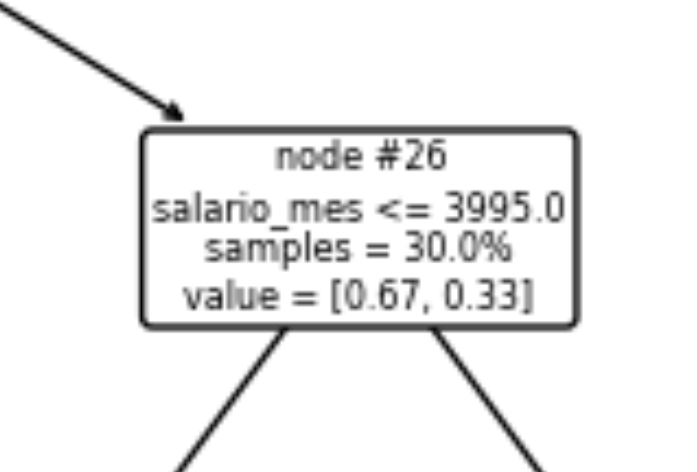

Nos vamos por el lado derecho

El 30% de los empleados que tienen horas extras.
De ese 30% el 33% de los empleados abandonan la empresa, lo cual nos da una penetración de abandono del 33%  de este segmento.
El modelo ha encontrado que la variable que mejos discrimina es la de salario mes.
El salario sea < 3995.0

Siguiendo el aábol con los 5 nodos el perfil que es más factible que abandone la empresa es
que realize horas extras - tenga un salario menor a 3995 - tenga un salario mayor a 2475 - el incremento menos a 21.5 - tenga una satisfacción no es alta
Por otro lado el gana mas de 3995 - es sales executive - número de empresas menor a 6.5 - salario del mes menor 19853 (98%)

*   5.2.   Importancia de las variables.

<Axes: >

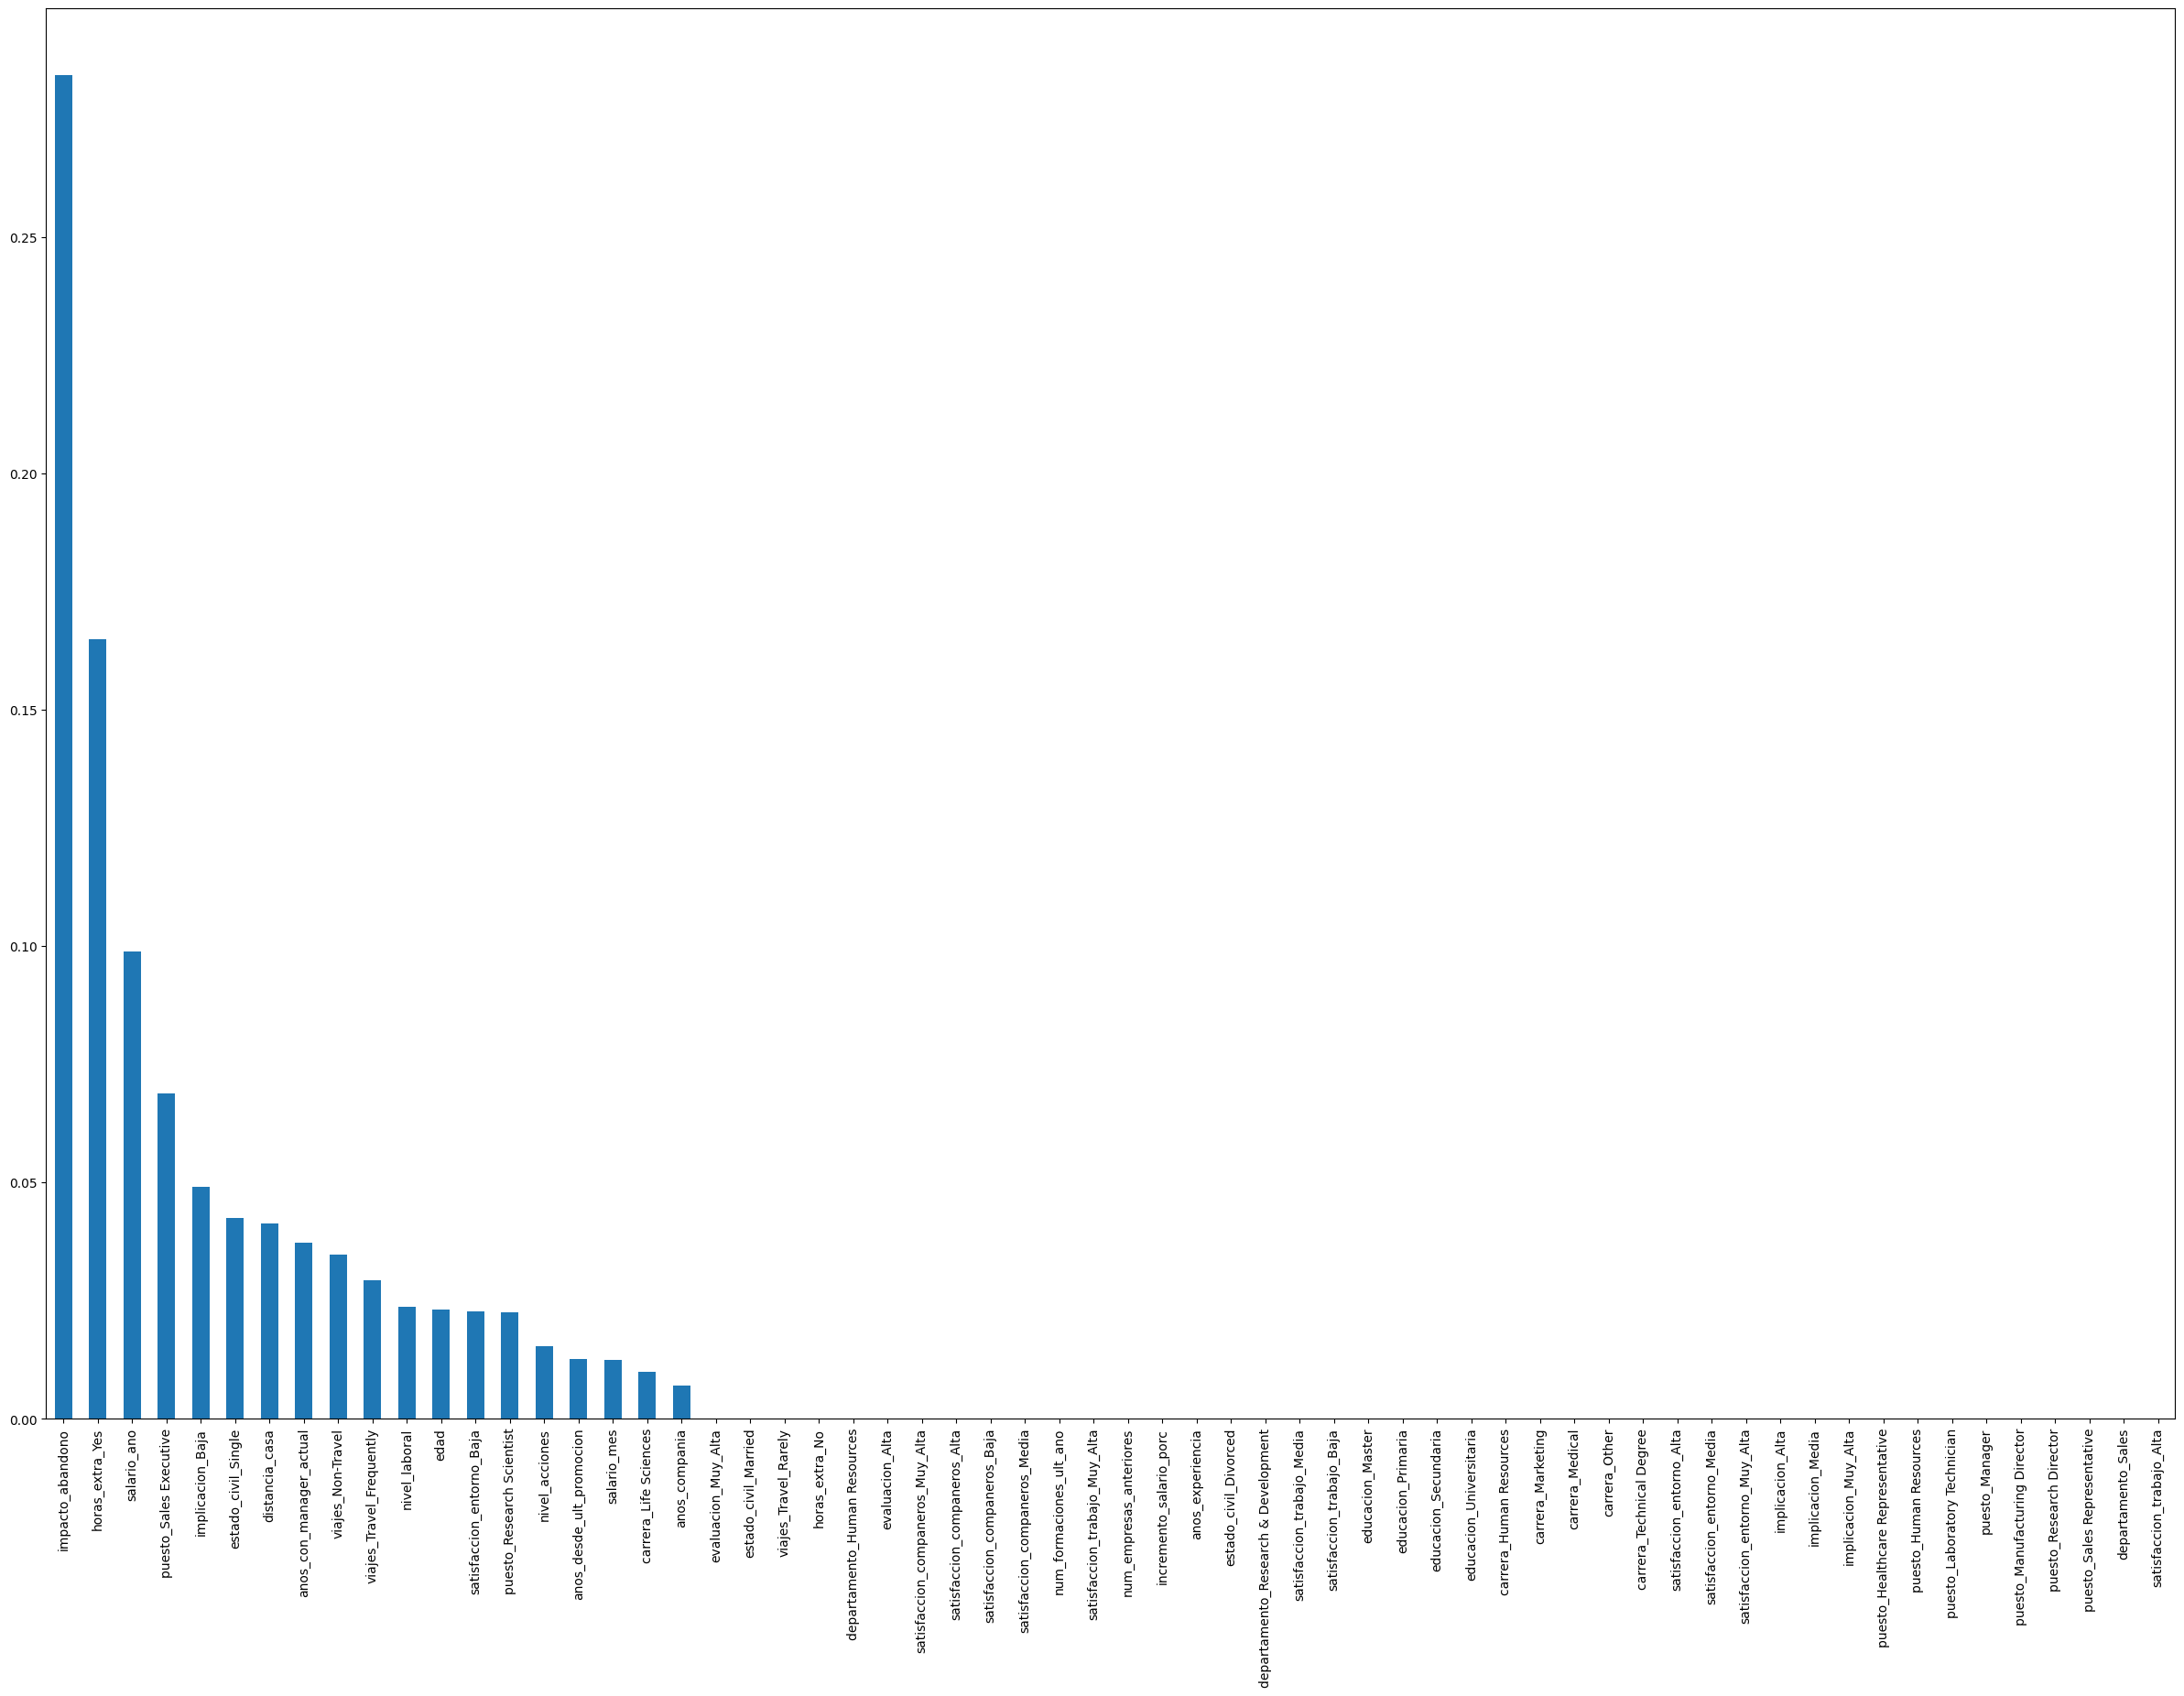

In [ ]:
pd.Series(ac.feature_importances_, index=test_x.columns).sort_values(ascending=False).plot(kind='bar', figsize=(30, 20))

Las variables más importantes:
Primer grupo:
*   Salario mes - Horas Extras - Edad
Segundo grupo:
*   Distancia a casa - Sales Executive - años con manager actual - incremento salaraial proporcional - impacto abandono
*   EL resto que tiene barra.


##6.    EXPLOTACIÓN

*   Incorporación del scoring al dataframe principal.

Todos los algoritmos en sklearn funcionan igual: .fit para entrenar y .predict para predecir (en este caso con _proba porque queremos la probabilidad)

In [ ]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns='abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14167.452,0.600000
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12127.320,0.038217
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,1.000000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.750000
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.081967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.038217
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,23618.724,0.038217
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,14519.688,0.080000


6.1.    Ejemplo de los 10 empleados con mayor probabilidad de abandono en la empresa.

In [ ]:
df.sort_values(by='scoring_abandono', ascending=False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1649,40,1,Travel_Rarely,Research & Development,7,Universitaria,Life Sciences,Baja,Alta,1,...,Media,0,10,3,4,0,3,25992,4184.712,1.0
1878,22,1,Travel_Rarely,Research & Development,7,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Baja,0,1,2,1,0,0,29664,4775.904,1.0
179,51,1,Travel_Frequently,Research & Development,8,Primaria,Life Sciences,Baja,Baja,3,...,Muy_Alta,0,18,2,4,0,3,127800,25176.600,1.0
483,40,0,Travel_Rarely,Research & Development,10,Master,Life Sciences,Muy_Alta,Muy_Alta,1,...,Alta,1,10,3,7,1,7,26556,4275.516,1.0
1862,32,1,Travel_Rarely,Sales,2,Secundaria,Marketing,Alta,Media,2,...,Alta,0,7,3,2,2,2,118884,23420.148,1.0
1489,34,1,Travel_Rarely,Sales,24,Secundaria,Medical,Baja,Media,2,...,Alta,0,16,2,15,10,10,55188,10872.036,1.0
1868,29,1,Travel_Frequently,Research & Development,24,Secundaria,Life Sciences,Muy_Alta,Media,1,...,Media,0,1,3,1,1,0,29268,4712.148,1.0
994,29,1,Travel_Rarely,Research & Development,10,Secundaria,Life Sciences,Muy_Alta,Media,1,...,Alta,0,3,5,0,0,0,28848,4644.528,1.0
1004,30,1,Travel_Rarely,Research & Development,22,Universitaria,Life Sciences,Baja,Alta,1,...,Media,0,7,2,5,0,1,25584,4119.024,1.0


6.2.    Los empleados que van a abandonar la empresa.

In [ ]:
df.loc[df['scoring_abandono']==1]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,1.0
19,28,1,Travel_Rarely,Research & Development,24,Secundaria,Life Sciences,Alta,Media,1,...,Media,0,6,4,4,0,3,24336,3918.096,1.0
55,26,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,Baja,1,...,Alta,0,1,2,1,0,1,27516,4430.076,1.0
133,37,1,Travel_Rarely,Human Resources,6,Universitaria,Human Resources,Alta,Alta,1,...,Muy_Alta,0,7,3,3,0,2,24876,4005.036,1.0
159,30,0,Travel_Frequently,Research & Development,23,Primaria,Life Sciences,Baja,Baja,1,...,Alta,3,10,2,10,0,9,31356,6177.132,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,28,1,Travel_Rarely,Sales,13,Universitaria,Marketing,Muy_Alta,Alta,2,...,Muy_Alta,0,6,0,2,2,2,118248,23294.856,1.0
1939,32,1,Travel_Frequently,Research & Development,5,Master,Life Sciences,Baja,Muy_Alta,1,...,Baja,0,8,2,4,0,3,29184,4698.624,1.0
1968,53,1,Travel_Rarely,Sales,24,Universitaria,Life Sciences,Baja,Alta,3,...,Media,0,15,2,2,2,2,125376,24699.072,1.0


6.3.    Riesgo de dejar la rmpresa por puesto de trabajo.

<Axes: title={'center': 'scoring_abandono'}, xlabel='puesto'>

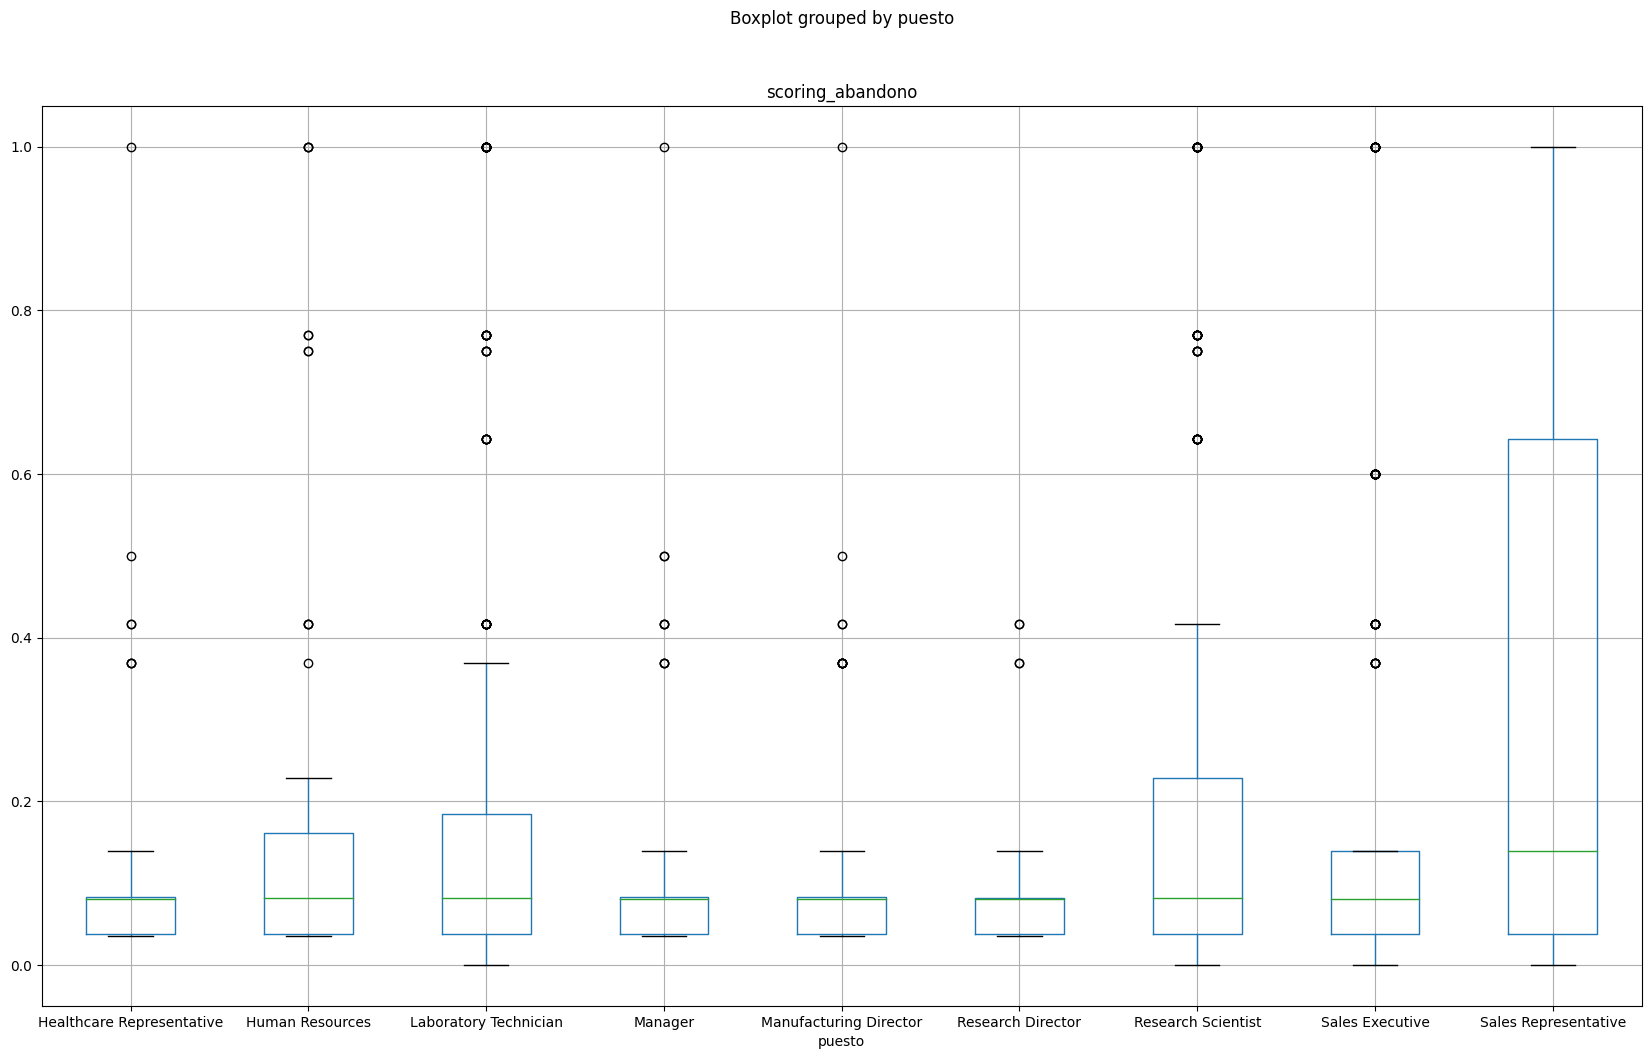

In [ ]:
df.boxplot(column='scoring_abandono', by='puesto', figsize=(20, 12))

##GUARDAR EL RESULTADO

In [ ]:
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx')
#files.download('abandono_con_scoring.xlsx')

Se ha visto y entendido para qué sirve hacer un modelo de machine learning.

Se ha visto las diferencias entre las fases de entrenamiento y puesta en producción.

Se ha comprendido la necesidad de dividir los datos en train y test.

Se ha conocido como funciona y cómo se interpreta el algoritmo de árbol de decisión.

Se ha entrenado nuestro primer modelo de machine learning.

Sabemos la principal métrica para evaluar modelos y los valores que indican si un modelo es bueno o malo.

Se ha visto como usar el modelo para hacer nuevas predicciones.

Se ha visto y aprendido a leer el diagrama de un árbol de decisión y conocer las variables más relevantes.

Se ha visto y entendido qué hacer con las predicciones y diferentes formas de explotar los resultados.

Pero ahora nos falta una parte clave: cómo productivizar todo nuestro trabajo tanto de Business Analytics como de Machine Learning.